In [138]:
#install.packages(c('readr','Hmisc','skimr','data.table','skimr','PerformanceAnalytics','corrplot'))

## 2.데이터 탐색
### 2-1)데이터셋을 로딩 -----------------------------------

#tr=trian의 약자
#utils::read.csv() / readr::read_delim() / data.table::fread()

In [139]:
#tr<-read.csv(file='/kaggle/input/customer-analytics/Train.csv',header=T,sep=',',stringsAsFactors=F,strip.white=T,na.strings=c(',','?','NA'))

#library(readr)
#tr_tb<-read_delim(file='/kaggle/input/customer-analytics/Train.csv',col_names=T,delim=',',trim_ws=T,na=c(',','?','NA'))

library(data.table)
tr_dt<-fread(input='/kaggle/input/customer-analytics/Train.csv', header=T,sep=',',stringsAsFactors=F,strip.white=T,na.strings=c(',','?','NA'))

### 2-2) 데이터셋 내용 및 구조 탐색-----------------------------------

객체 파악

In [140]:
tr
class(tr) 
str(tr)
tr<-tr[,-1]
#psych::heaTail()
library(psych)

headTail(tr)
headTail(tr,10,15)

Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
<chr>,<chr>,<int>,<int>,<int>
low,F,44,1233,1
low,M,59,3088,1
low,M,48,3374,1
medium,M,10,1177,1
medium,F,46,2484,1
medium,F,12,1417,1
low,F,3,2371,1
low,F,48,2804,1
low,F,11,1861,1


[1] "data.frame"

,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
,<chr>,<chr>,<chr>,<chr>
1,F,44,1233,1
2,M,59,3088,1
3,M,48,3374,1
4,M,10,1177,1
...,NA,...,...,...
10996,F,6,1247,0
10997,F,4,1155,0
10998,M,2,1210,0
10999,F,6,1639,0


,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
,<chr>,<chr>,<chr>,<chr>
1,F,44,1233,1
2,M,59,3088,1
3,M,48,3374,1
4,M,10,1177,1
5,F,46,2484,1
6,F,12,1417,1
7,F,3,2371,1
8,F,48,2804,1
9,F,11,1861,1


객체별 데이터 보기

In [141]:
View(tr)

Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
<chr>,<int>,<int>,<int>
F,44,1233,1
M,59,3088,1
M,48,3374,1
M,10,1177,1
F,46,2484,1
F,12,1417,1
F,3,2371,1
F,48,2804,1
F,11,1861,1


In [142]:
tr_tb

ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
6,F,Flight,3,1,162,3,medium,F,12,1417,1
7,D,Flight,3,4,250,3,low,F,3,2371,1
8,F,Flight,4,1,233,2,low,F,48,2804,1
9,A,Flight,3,4,150,3,low,F,11,1861,1


In [143]:
tr_dt

ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
6,F,Flight,3,1,162,3,medium,F,12,1417,1
7,D,Flight,3,4,250,3,low,F,3,2371,1
8,F,Flight,4,1,233,2,low,F,48,2804,1
9,A,Flight,3,4,150,3,low,F,11,1861,1


In [144]:
dim(tr)

[1] 10999     4

데이터 규모 파악

In [145]:
tr_dim<-dim(tr)
sprintf('데이터 셋의 규모-> 레코드 갯수: %d개, 변수 컬럼 갯수: %d개', tr_dim[1],tr_dim[2])

[1] "데이터 셋의 규모-> 레코드 갯수: 10999개, 변수 컬럼 갯수: 4개"

데이터 구조(변수 종류, 열 이름) 파악

In [146]:
colnames(tr)
names(tr)

[1] "Gender"              "Discount_offered"    "Weight_in_gms"      
[4] "Reached.on.Time_Y.N"

[1] "Gender"              "Discount_offered"    "Weight_in_gms"      
[4] "Reached.on.Time_Y.N"

데이터 셋 기본 요약 : 기본 요약-utils::str()/ 기술통계분석-psych::describe(), Hmisc::describe(), skimr::skim()

In [147]:
summary(tr)
#install.packages('psych')
library(psych)
psych::describe(tr)

    Gender          Discount_offered Weight_in_gms  Reached.on.Time_Y.N
 Length:10999       Min.   : 1.00    Min.   :1001   Min.   :0.0000     
 Class :character   1st Qu.: 4.00    1st Qu.:1840   1st Qu.:0.0000     
 Mode  :character   Median : 7.00    Median :4149   Median :1.0000     
                    Mean   :13.37    Mean   :3634   Mean   :0.5967     
                    3rd Qu.:10.00    3rd Qu.:5050   3rd Qu.:1.0000     
                    Max.   :65.00    Max.   :7846   Max.   :1.0000     

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gender*,1,10999,1.4958633,0.5000056,1,1.4948301,0.0000,1,2,1,0.01654527,-1.999908,0.004767583
Discount_offered,2,10999,13.3732157,16.2055271,7,9.7872969,4.4478,1,65,64,1.79843848,1.998222,0.154520662
Weight_in_gms,3,10999,3634.0167288,1635.3772514,4149,3669.9398932,1974.8232,1001,7846,6845,-0.24967864,-1.447840,15.593419093
Reached.on.Time_Y.N,4,10999,0.5966906,0.4905841,1,0.6208385,0.0000,0,1,1,-0.39414978,-1.844814,0.004677749


In [148]:
#install.packages('skimr')
library(skimr)
skimr::skim(tr)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,Gender,0,1,1,1,0,2,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,Discount_offered,0,1,NA,NA,NA,NA,NA,13.3732157,16.2055271,1,4.0,7,10,65,▇▁▁▁▁
3,numeric,Weight_in_gms,0,1,NA,NA,NA,NA,NA,3634.0167288,1635.3772514,1001,1839.5,4149,5050,7846,▇▃▇▆▁
4,numeric,Reached.on.Time_Y.N,0,1,NA,NA,NA,NA,NA,0.5966906,0.4905841,0,0.0,1,1,1,▆▁▁▁▇


── Data Summary ────────────────────────
                           Values
Name                       tr    
Number of rows             10999 
Number of columns          4     
_______________________          
Column type frequency:           
  character                1     
  numeric                  3     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Gender                0             1   1   1     0        2          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable       n_missing complete_rate     mean       sd   p0   p25  p50
1 Discount_offered            0             1   13.4     16.2      1    4     7
2 Weight_in_gms               0             1 3634.    1635.    1001 1840. 4149
3 Reached.on.Time_Y.N         0             1    0.597    0.491    


### 2-3) 데이터셋 시각화

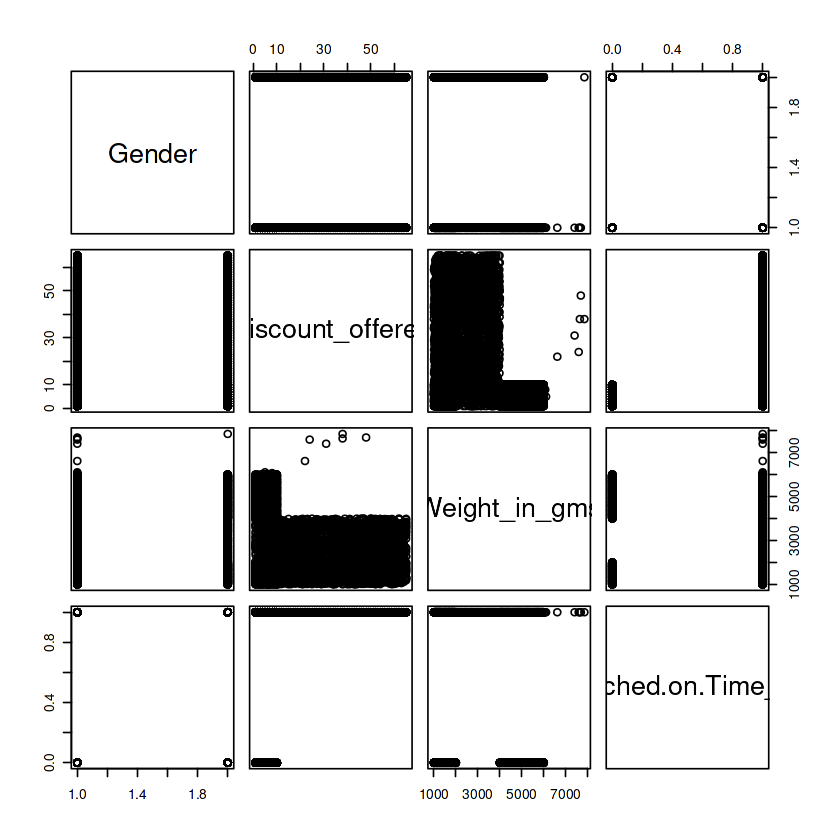

In [149]:
plot(tr)#산점도 매트릭스: 전체 변수

In [150]:
#install.packages('dplyr')
#library('dplyr')

## 3.개별 변수 요약과 집계

#### 범주형 변수 컬럼 분석

In [151]:

ctg_names<-c("ID",'Mode_of_Shipment','Reached.on.Time_Y.N','Product_importance', "Warehouse_block","Gender")
ctg<-tr[c("ID",'Mode_of_Shipment','Reached.on.Time_Y.N','Product_importance', "Warehouse_block","Gender")]
str(ctg)
head(ctg)
summary(ctg)

ERROR: Error in `[.data.frame`(tr, c("ID", "Mode_of_Shipment", "Reached.on.Time_Y.N", : undefined columns selected


#### 연속형 변수 칼럼별 분석

In [ ]:
cnt_names<-c("Customer_care_calls","Customer_rating", "Cost_of_the_Product" ,"Prior_purchases","Discount_offered", "Weight_in_gms" )
cnt<-tr[cnt_names]
head(cnt)
str(cnt)
summary(cnt)

sprintf('전체변수갯수: %d개 = 범주형변수갯수(%d개) + 연속형변수갯수(%d개)',
        length(names(tr)), length(ctg_names), length(cnt_names))

names(tr)

### 3-1) 데이터셋 중 범주형 변수를 2개 선정해 특성요약과 시각화
**정시 도착**

In [ ]:
str(tr$Reached.on.Time_Y.N)

#요약집계
ctg$Reached.on.Time_Y.N_f<-factor(tr$Reached.on.Time_Y.N,levels=c(0,1),labels=c('on.time','late'))
str(ctg)
head(ctg)

왜도가 -0.39, 첨도가 -1.84인 것으로 보아 평균에서 살짝 오른쪽으로 치우쳐져 있고 정규분포보다는 더 납작한 모양이다

In [ ]:
psych::describe(tr$Reached.on.Time_Y.N)
Hmisc::describe(ctg$Reached.on.Time_Y.N)
on.time_f_freq <- table(ctg$Reached.on.Time_Y.N_f)  
on.time_f_freq
library(dplyr)
on.time_f_prop <-on.time_f_freq%>%prop.table()
on.time_f_pect<-round(on.time_f_prop*100,3)
on.time_f_pect

집계 결과 해당 업체는 제시간에 도착한 비율보다 늦은 비율이약 19% 높은 것을 알수 있다.
해당 업체에서 정시 배송을 받을 확률이 불과 40%정도 밖에 안되는 것으로 보아 적절한 배송 시간을 잘 예측하지 못하는 것으로 볼 수 있다.

In [ ]:

#-----------------------------------시각화(이를 시각화하면 아래와 같다)-----------------------------------

par(mfrow=c(2, 2)) # 멀티 캔버스 프레임 구성

barplot(on.time_f_freq,
        main="정시 배송 성공 지표: Simple Bar Plot",
        xlab="배송 속도", ylab="횟수")

barplot(on.time_f_freq,
        main="정시 배송 성공 지표: Horizontal Bar Plot",
        xlab="배송 속도", ylab="횟수", horiz=TRUE)

barplot(on.time_f_prop,
        main="정시 배송 성공 지표: Simple Bar Plot",
        xlab="배송 속도", ylab="횟수", density=c(20, 30),
        legend=rownames(on.time_f_freq))

barplot(on.time_f_prop,
        main="정시 배송 성공 지표: Horizontal Bar Plot",
        xlab="성별", ylab="횟수",
        horiz=TRUE, col=c("yellow", "purple"), 
        beside=TRUE, legend=rownames(on.time_f_freq))

par(mfrow=c(1, 1)) # 멀티 캔버스 프레임 리셋

#제품 중요도)변수 구조 파악
str(tr$Product_importance)

In [ ]:
#-----------------------------------요약집계-----------------------------------
psych::describe(tr$Product_importance)
Hmisc::describe(ctg$Product_importance)

왜도가 0.59, 첨도가 -0.63인것으로 보아 정규분포와 매우 유사하지만 보다 살짝 왼쪽으로 치우쳐지고 조금 납작한 분포이다.

In [ ]:
ctg$Product_importance_f <- factor(ctg$Product_importance, levels = c( 1, 2, 3),labels = c('낮음','보통','높음'))
head(ctg)                    
str(ctg)

impor_f_freq <- table(ctg$Product_importance_f)
impor_f_freq

impor_f_prop <- prop.table(impor_f_freq)
impor_f_prop

impor_f_pect<-round(impor_f_prop*100,3)
impor_f_pect

해당 배송 데이터 기록 중 제품 중요도가 높은 것은 약 8%, 보통은 약 43%, 낮은 것은 약 48%로 
전반적으로 제품 중요도가 그다지 높지 않은 제품들 위주로 배송하는 것으로 보인다.

In [ ]:
#-----------------------------------시각화-----------------------------------
par(mfrow=c(2, 2)) 

barplot(impor_f_freq,
        main="제품 중요도 분포비교",
        xlab="제품 중요도", ylab="제품 수")

barplot(impor_f_freq,
        main="제품 중요도 분포비교",
        xlab="제품 중요도", ylab="제품 수", las = 1, horiz=TRUE)

barplot(impor_f_prop,
        main="제품 중요도 비율 분포 비교",
        xlab="제품 중요도", ylab="제품 수", density=c(20, 30),
        legend=rownames(impor_f_freq))

barplot(impor_f_prop,
        main="제품 중요도  비율 분포 비교",
        xlab="제품 중요도", ylab="제품 수", las = 1,
        horiz=TRUE, col=c("yellow", "purple"), 
        beside=TRUE, legend=rownames(impor_f_freq))

### 3-2) 데이터셋 중 연속형 변수를 2개 선정해 특성요약과 시각화------------------------------------

**배송 문의 전화**

In [ ]:
str(cnt$Customer_care_calls)

#-----------------------------------특성요약-----------------------------------
psych::describe(cnt$Customer_care_calls)#최대, 최소 왜도, 첨도확인 가능
Hmisc::describe(cnt$Customer_care_calls)
skim(cnt$Customer_care_calls)

mean(cnt$Customer_care_calls, na.rm = TRUE, trim = 0.3)#평균
call_freq <- table(cnt$Customer_care_calls)
call_freq%>%sort(., decreasing = TRUE)%>%{names(which.max(.))}#최빈값
var(cnt$Customer_care_calls, na.rm = TRUE)#분산
sd(cnt$Customer_care_calls, na.rm = TRUE)#표준 편차
sd(cnt$Customer_care_calls, na.rm = TRUE)#범위

왜도가 0.39 첨도가 -0.31인 것으로 보아 정규분포와 아주 유사하지만 살짝 왼쪽으로 치우치고 낮은 분포를 가지고 있음을 알수 있다.

In [ ]:

#------------------------------------시각화------------------------------------
plot(cnt$Customer_care_calls, type = "p", pch = 21, bg = "yellow")

abline(h= seq(from = 1, to = 10, by = 1), col = "gray", lty = 2)   # 가이드라인(안내선) 그리기

abline(v = seq(from = 1000, 
               to = 14000, 
               by = 1000), 
       col = "gray", lty = 2)

par(mfrow=c(2, 2))
hist(cnt$Customer_care_calls, main="hist(), Frequency 옵션")
hist(cnt$Customer_care_calls, probability=TRUE, main="hist(), Probabilty 옵션")
plot(density(cnt$Customer_care_calls), main="density() 확률밀도 옵션")
hist(cnt$Customer_care_calls, probability=TRUE,
     main="hist() 히스토그램과 density() 확률밀도함수 통합")
lines(density(cnt$Customer_care_calls))
par(mfrow=c(1, 1))

boxplot(cnt$Customer_care_calls,
        main="박스플롯",
        ylab="배송 문의 전화")

해당 업체는 배송 문의 전화가 고객별 평균 3-4건을 걸려오는 것으로 볼 수 있다.

제품 가격

In [ ]:
str(cnt$Cost_of_the_Product)

#------------------------------------요약집계------------------------------------
library(skimr)
psych::describe(cnt$Cost_of_the_Product)#최대, 최소 왜도, 첨도확인 가능
Hmisc::describe(cnt$Cost_of_the_Product)
skim(cnt$Cost_of_the_Product)

mean(cnt$Cost_of_the_Product, na.rm = TRUE, trim = 0.3)#평균
price_freq <- table(cnt$Cost_of_the_Product)
price_freq%>%sort(., decreasing = TRUE)%>%{names(which.max(.))}#최빈값
var(cnt$Cost_of_the_Product, na.rm = TRUE)#분산
sd(cnt$Cost_of_the_Product, na.rm = TRUE)#표준 편차
sd(cnt$Cost_of_the_Product, na.rm = TRUE)#범위

왜도가 -0.16, 첨도가 -0.097인 것으로 보아 정규분포보다 살짝 오른쪽에 치우쳐져 있고 낮은 분포를 가졌다.

In [ ]:
#------------------------------------시각화------------------------------------
plot(cnt$Cost_of_the_Product, type = "p", 
     pch = 21, bg = "yellow")

# 가이드라인(안내선) 그리기
abline(h = seq(from = 1, 
               to = 400, 
               by = 25), 
       col = "gray", lty = 2)
abline(v = seq(from = 1000, 
               to = 14000, 
               by = 1000), 
       col = "gray", lty = 2)

par(mfrow=c(2, 2))
hist(cnt$Cost_of_the_Product, main="hist(), Frequency 옵션")
hist(cnt$Cost_of_the_Product, probability=TRUE, main="hist(), Probabilty 옵션")
plot(density(cnt$Cost_of_the_Product), main="density() 확률밀도 옵션")
hist(cnt$Cost_of_the_Product, probability=TRUE,
     main="hist() 히스토그램과 density() 확률밀도함수 통합")
lines(density(cnt$Cost_of_the_Product))
par(mfrow=c(1, 1))

boxplot(cnt$Cost_of_the_Product,
        main="박스플롯",
        ylab="제품 가격대")

주문의 약 70%가 제품 가격이 135-251달러인 제품으로 이루어져 있으며 특히 전체 가격의 약 상위 25%의 정도의 가격대인 245달러 부근에서 가장 많이 구매 했음을 알수 있다.

## 4. 다차원변수 요약과 집계

### 4-1) 3장에서 다룬 범주형 변수 2개간 특성요약과 시각화

In [ ]:
table(ctg$Product_importance_f,ctg$Reached.on.Time_Y.N_f, useNA = 'ifany')
impor_on_freq <-table(ctg$Product_importance_f,ctg$Reached.on.Time_Y.N_f)
impor_on_freq # 제품 중요도에 따른 정시 배송 성공 교차분석 

table(ctg$Reached.on.Time_Y.N_f,ctg$Product_importance_f, useNA = 'ifany')

on_impor_freq <-table(ctg$Reached.on.Time_Y.N_f,ctg$Product_importance_f)
on_impor_freq# 정시 배송에 따른 제품 중요도성공 교차분석

#------------------------------------특성요약------------------------------------
# 교차빈도분석 부분합(margin) 계산하기
addmargins(impor_on_freq)
addmargins(impor_on_freq, 1)
addmargins(impor_on_freq, 2)

impor_on_freq_sum <- addmargins(impor_on_freq, 2)
impor_on_freq_sum

# 교차빈도분석을 비율분석으로 변환
prop.table(impor_on_freq, 1) # 각 중요도에서 정시 성공 분포비율 비교
prop.table(impor_on_freq, 2) # 각 정시성공에서 중요도 분포비율 비교

impor_on_prop <- prop.table(impor_on_freq, 1) 
impor_on_prop 

impor_on_prop%>%round(.,3)%>%addmargins(.,2)

# 교차비율분석을 백분율분석으로 변환
impor_on_result <- round(impor_on_prop, 3) * 100
impor_on_result

addmargins(impor_on_result, 2)

In [ ]:
#---------------------------------시각화-----------------------------------
par(mfrow=c(2, 2))

barplot(impor_on_freq,
        main="정시 배달에 따른\n 제품 중요도 분포비교: Stacked",
        xlab="제품 중요도(prodcut_importance)", ylab="주문 건수",
        col=c("yellow", 'skyblue',"purple"), legend=rownames(impor_on_freq))

barplot(impor_on_freq,
        main="정시 배달에 따른\n 제품 중요도 분포비교: Grouped",
        xlab="제품 중요도(prodcut_importance)", ylab="주문 건수", beside=TRUE, 
        col=c("yellow",'skyblue', "purple"), legend=rownames(impor_on_freq))

barplot(on_impor_freq,
        main="제품 중요도에 따른\n 정시 배달 분포비교: Stacked",
        xlab="정시 배달(on_time)",ylab="Frequency",
        col=rainbow(6), legend=rownames(impor_on_freq))

barplot(on_impor_freq,
        main="제품 중요도에 따른\n 정시 배달 분포비교: Grouped",
        xlab="Treatment", ylab="Frequency",
        col=rainbow(6), legend=rownames(impor_on_freq), beside=TRUE)

par(mfrow=c(1, 1))

par(mfrow=c(2, 2))

plot(Product_importance_f ~ Reached.on.Time_Y.N_f, data = ctg,
     main="정시 배달(on time)에 따른\n 제품 중요도(importance) 분포비교",
     xlab="정시 배달(on time)", ylab="제품 중요도",
     col = rainbow(length(unique(ctg$Product_importance_f))))

plot(Reached.on.Time_Y.N_f~ Product_importance_f, data = ctg,
     main="제품 중요도(importance)에 따른\n 정시 배달(on time) 분포비교",
     xlab="제품 중요도(importance)", ylab="정시 배달(on time)",
     col=rainbow(length(levels(ctg$Reached.on.Time_Y.N_f))))

mosaicplot( Reached.on.Time_Y.N_f~Product_importance_f, data = ctg,
            main="정시 배달(on time)에 따른\n 제품 중요도(importance) 분포비교",
            xlab="정시 배달(on time)", ylab="제품 중요도(importance)",
            col = rainbow(length(levels(ctg$Product_importance_f))))

mosaicplot(Product_importance_f~Reached.on.Time_Y.N_f, data = ctg,
           main="제품 중요도(importance)에 따른\n 정시 배달(on time) 분포비교",
           xlab="제품 중요도(importance)", ylab="정시 배달(on time)",
           col = rainbow(length(levels(ctg$Reached.on.Time_Y.N_f))))

par(mfrow=c(1, 1)) # 멀티 캔버스 프레임 리셋
levels(ctg$Reached.on.Time_Y.N_f)

제품 중요도와 정시 배송의 관계를 살펴 보면 중요도 전체적으로 늦는 비율이 더 높고 중요도가 높을 수록 정시 배송에 실패한다는 결과를 볼 수 있다.
위에서 분석했을때,전체 주문 제품중 중요도가 가장 높은 제품의 비중이 불과 8%로 낮았던 결과를 볼수 있다.
이로 미루어 보아  제품 중요도가 높은 제품을 잘 배송하지 않는 특성을 가져, 배송의 정확도가 떨어지는 것에 덜 민감한 것으로 볼 수 있다. 
또한 고객의 92%가 각각 비등한 비율로 보통(48.1%),낮음(43.2)의 중요도인 제품을 주문하고 있기 때문에 
낮음-높음의 정시 배송률은 4.3%으로 차이가 나는 것에 비해 낮음-보통의 정시 배송률은 0.3의 거의 비등한 배송률을 가진다는 것을 볼수 있다.
때문에 해당 회사는 8%의 고객의 배송 정확도 보다 대부분의 고객이 위치한 낮음-보통의 배송 정확도를 비교적 맞추려는 경향을 띄어서,
중요도가 높을 수록 역으로 정시배달률이 떨어지는 상반되는 현상이 나타났다고 할수 있다. 
이는 해당 회사의 배송 예측도를 다시한번 검증해보고 주 고객층이 이용하는 제품군이 중요도가 낮음과 보통에 상당히 밀집해 있음으로 보아 이 제품군을 세분화/집중하고 
중요도가 높은 제품군은 최소화하는 브랜드 전략을 세울수 있는 지표가 될수 있다.

### 4-2) 3장에서 다룬 연속형 변수 2개간 특성요약과 시각화 

**특성 요약: 제품 가격(price)에 따른 고객 문의 전화 수(calls) 변수간 상관관계 파악**

In [ ]:
# 공분산(covariance) 분석
var(cnt$Cost_of_the_Product, cnt$Customer_care_calls)

# 상관성(correlation) 분석
cor(cnt$Cost_of_the_Product, cnt$Customer_care_calls, method = 'spearman')
cor(cnt$Cost_of_the_Product, cnt$Customer_care_calls, method = 'pearson')

상관 계수가 양수임을 보아 제품 가격과 고객 문의 전화 수는 같은 방향으로 움직인다는 것을 알수 있다.

In [ ]:
#----------------------------시각화------------------------------

# 기본 graphics::plot() 함수이용: 직선과 곡선 최적합화선 추가
plot( Cost_of_the_Product~Customer_care_calls , data = cnt, pch=19,
      main = '배송 문의 전화와 제품 가격간 관련성',
      xlab = '배송 문의 전화(calls)', 
      ylab = '제품 가격(price)')

# 최적의 추세직선추가
abline(lm(Cost_of_the_Product~Customer_care_calls, data = cnt), 
       col="red", lwd=2, lty=1)

# 최적의 추세곡선추가
lines(lowess(cnt$Cost_of_the_Product ~ cnt$Customer_care_calls), 
      col="blue", lwd=2, lty=2) 

# ggplot2::ggplot() 함수이용: 최적합선 추가
library(ggplot2)

p <- ggplot(data = cnt, aes(x =Cost_of_the_Product  , y =Customer_care_calls)) +
  geom_point() + labs(title = "배송 문의 전화과 제품 가격간 관련성", 
                      y = "배송 문의 전화(calls)", 
                      x = "제품 가격(price)")
p

p <- p + geom_smooth() # 최적합선과 오차범위를 표현
p

# plotly::plotly() 함수이용: 최적합선 추가
#options("install.lock"=FALSE) lock오류 발생-해결
#install.packages('plotly')
library(plotly)

ggplotly(p)

고객 전화는 제품 가격이 낮을 수록 낮은 횟수에 위치하고 제품 가격이 높을 수록 높은 횟수에 위치한다.
전체적인 그래프는 고르게 분포되어 있지만 최적합선이 보여주듯이 낮은 가격에서는 비교적 낮은 문의 전화 
수를 가지고 높은 가격일 수록 문의 전화 수가 오르는 것을 볼 수 있다. 
이것은 높은 가격의 제품을 주문 했을 수록 고객의 배송 관심도가 높아진다는 것을 보여준다.
이러한 지표는 해당 회사의 소비자의 니즈를 보여준다고 볼수 있다.
때문에 이러한 소비자의 니즈에 비추어 보아 해당 회사는 문의전화 인력을 낭비하는 방향보다 
미리 온라인 배송 알림 시스템을 실시간으로 자세히 구축하고 QnA시스템이을 보다 자세히 제공하는 것이 
소비자에게 더 큰 만족감을 주고 회사의 인력을 아끼는 선택이 될 수 있다고 보여진다.

### 4-3) 3장에서 다룬 범주형변수와 연속형변수 중 1개 관계를 선정해 특성요약과 시각화

**특성요약: 정시배송-배송 문의 전화**

In [ ]:
tr$Reached.on.Time_Y.N_f<-ctg$Reached.on.Time_Y.N_f
str(tr$Reached.on.Time_Y.N_f)

# stats::aggregate()함수이용 요약집계
aggregate(formula = Customer_care_calls ~ Reached.on.Time_Y.N, data = tr, FUN = mean, na.rm = TRUE)
aggregate(Customer_care_calls ~  Reached.on.Time_Y.N_f, tr, mean, na.rm = TRUE, trim = 0.05)
aggregate(Customer_care_calls ~ Reached.on.Time_Y.N_f, tr, sd, na.rm = TRUE)

# magrittr::파이프연산자 %>%, dplyr::데이터가공함수 이용 요약집계  
# install.packages('magrittr')
#library(magrittr)
#library(dplyr)

tr %>% group_by(Reached.on.Time_Y.N_f) %>%  
  dplyr::summarize(Avg = mean(Customer_care_calls), SD = sd(Customer_care_calls)) %>% 
  arrange(desc(Avg))

In [ ]:
#----------------------------시각화-----------------------------------
par(mfrow=c(1, 2))

# sm::sm.density.compare()를 사용한 밀도그래프
#install.packages("sm")
library(sm)
sm.density.compare(x=tr$Customer_care_calls, group=tr$Reached.on.Time_Y.N_f,
                   xlab="배송 문의 전화(calls)", ylab="밀도", 
                   col=c(2, 3), lty=c(2, 3))
title(main="정시 배달에 따른 배송 문의 전화 분포비교")
legend(x=100000, y=0.01, legend=levels(tr$Reached.on.Time_Y.N_f), 
       col=c(2, 3, 4), lty=c(2, 3, 4), bty="n")

# boxplot()를 사용한 그래프
boxplot(Customer_care_calls ~ Reached.on.Time_Y.N_f, data = tr,
        main="정시 배달에 따른 배송 문의 전화 분포비교",
        xlab="정시 배송(on time)", ylab="배송 문의 전화(calls)",
        col=c(2, 3), varwidth=T, notch=T)

par(mfrow=c(1, 1))

# 멀티프레임에 배치할 개별 그래프 준비
# 단순 플롯팅 그래프
p1 <- ggplot(tr, aes(Reached.on.Time_Y.N_f, Customer_care_calls)) + 
  geom_point(color = "red", shape = 20, size = 2)

# 모든 데이터를 플로팅하는 형태로 분포모양을 나타냄
p2 <- ggplot(tr, aes(Reached.on.Time_Y.N_f, Customer_care_calls)) + 
  geom_jitter(color = "blue", shape = 8, size = 0.8)

# 박스플롯 형태로 분포모양을 나타냄
p3 <- ggplot(tr, aes(Reached.on.Time_Y.N_f, Customer_care_calls)) + 
  geom_boxplot(fill = "lightblue", 
               outlier.color ="orange", outlier.shape = 17,
               outlier.size = 2, notch = TRUE)

# 바이올린 플롯형태로 분포모양을 나타냄
p4 <- ggplot(tr, aes(Reached.on.Time_Y.N_f, Customer_care_calls)) + 
  geom_violin(fill = "lightpink")

# gridExtra::grid.arrange() 함수이용 
# ggplot2용 멀티프레임 생성
library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol = 2)

배송 문의 전화는 정시 도착과 지각 모두 평균적으로 문의 전화 3-5건의 비율이 전체 건수의 가장 많은 비율을 차지 하고 있다. 
대부분의 그래프 분포 모양이 비슷하지만 문의 전화의 최소값인 2건과 최대값인 7건의 비율이 정시 배송에서 더 적게 나타난다는 것이다.

  ## 5. 데이터 가공
  
  ### 5-1) 데이터셋 중 변수 리코딩 작업 2개 실시
  
 **정시 배송 리코딩**

In [ ]:
str(ctg$Reached.on.Time_Y.N_f)
tr$Reached.on.Time_Y.N_l1[tr$Reached.on.Time_Y.N==0] <-T
tr$Reached.on.Time_Y.N_l1[tr$Reached.on.Time_Y.N ==1]<-F
# 리코딩결과 변수컬럼명으로 확인
head(tr)

# 정규표현식으로 정시 배송 관련변수들만 인덱싱
ontime_idx <- grep(names(tr), pattern ='^Reached.on.Time_Y.N_[:alpha:]{0,}')
ontime_idx
ontime_names <- grep(names(tr), pattern = '^Reached.on.Time_Y.N_[:alpha:]{0,}', value = TRUE)
ontime_names

head(tr[c('Reached.on.Time_Y.N', ontime_names)])

# 리코딩 결과 변수특성으로 확인
sapply(tr[c(ontime_names)], table) # ontime관련 변수들 빈도분석
sapply(tr[c(ontime_names)], unique) # ontime관련 변수들 고유값 확인

#-------------------배송방식 리코딩------------------------------------

tr$Mode_of_Shipment_c1[tr$Mode_of_Shipment == 1] <- '도로' 
tr$Mode_of_Shipment_c1[tr$Mode_of_Shipment == 2] <-'선박' 
tr$Mode_of_Shipment_c1[tr$Mode_of_Shipment== 3] <-'비행기' 

head(tr)

# 정규표현식으로 성별 관련변수들만 인덱싱
mode_idx <- grep(names(tr), pattern = '^Mode_of_Shipment_[:alpha:]{0,}')
mode_idx
mode_names <- grep(names(tr), pattern = '^Mode_of_Shipment_[:alpha:]{0,}', value = TRUE)
mode_names
head(tr[c( mode_names)])

# 리코딩 결과 변수특성으로 확인
sapply(tr[c( mode_names)], table) # gender관련 변수들 빈도분석
sapply(tr[c( mode_names)], unique) # gender관련 변수들 고유값 확인

### 5-2) 데이터셋 중 요약변수 2개 만들기--------------------------------------------------
**이전구매내역**

변동성-채널) 카드사용 채널종류의 집중도·다양성

In [ ]:
#library(skimr) 
psych::describe(cnt$Prior_purchases)#최대, 최소 왜도, 첨도확인 가능
Hmisc::describe(cnt$Prior_purchases)

prior_freq <- table(cnt$Prpior_purchases)

# 왜도와 첨도 계산용 패키지 설치와 로딩
#install.packages("fBasics")
#library(fBasics)
#평균, 분산,표준편차,범위, 최빈값, 최대, 최소
a<-c(mean(cnt$Prior_purchases, na.rm = TRUE, trim = 0.3),var(cnt$Prior_purchases, na.rm = TRUE),
     sd(cnt$Prior_purchases, na.rm = TRUE),range(cnt$Prior_purchases, na.rm = TRUE),
     names(which.max(sort(prior_freq, decreasing = TRUE))),max(cnt$Prior_purchases),min(cnt$Prior_purchases))

n<-c('평균','분산','표준편차','범위','최빈값','최대','최소')
pri_pur<-matrix(a,ncol=7)
pri_pur
colnames(pri_pur)<-n
pri_pur

#고객 평가 

cus_freq <- table(cnt$Customer_rating)
b<-c(mean(cnt$Customer_rating, na.rm = TRUE, trim = 0.3),var(cnt$Customer_rating, na.rm = TRUE),
     sd(cnt$Customer_rating, na.rm = TRUE),range(cnt$Customer_rating, na.rm = TRUE),
     names(which.max(sort(cus_freq, decreasing = TRUE))),max(cnt$Customer_rating),min(cnt$Customer_rating))

n<-c('평균','분산','표준편차','범위','최빈값','최대','최소')
cus_ra<-matrix(a,ncol=7)
cus_ra
colnames(cus_ra)<-n
colnames(cus_ra)
cus_ra

### 5-3) 데이터셋 중 파생변수 2개 만들기
**실질 구매가**

- 실질 구매가=제품 가격*(100-할인율(%))*0.01

In [ ]:
# 제품가격/할인율 변수 기본탐색
ac_price <- subset(tr, select = c('Cost_of_the_Product', 'Discount_offered'))
head(ac_price)
#구조파악
str(actuall_price)
psych::describe(ac_price)
Hmisc::describe(ac_price)

tr$actual_price <- (tr$Cost_of_the_Product *(100-tr$Discount_offered)*0.01)

head(tr[c('Cost_of_the_Product','Discount_offered','actual_price')])

**제품가격**

In [ ]:
#제품 가격 구간화를 통해 고객 등급 단위 설정

psych::describe(tr$actual_price)
Hmisc::describe(tr$actual_price)
# base::cut() 함수이용
tr$Cost_of_the_Product_r <- cut(tr$Cost_of_the_Product, 
                                breaks = c(-Inf, 100,150,255, Inf),
                                include.lowest = TRUE, right = FALSE,
                                labels = c('Tree', 'Pine', 'Silver','Gold'))

# 구간화를 통한 파생변수 생성결과 변수컬럼명으로 확인
head(tr[c('Cost_of_the_Product', 'Cost_of_the_Product_r')])
str(tr)


### 5-4) 5장에서 만든 리코딩변수/요약변수/파생변수 중 범주형 변수 2개간 특성요약과 시각화

**배송 방식-정시배송**

In [ ]:
mode_c_f<-factor(tr$Mode_of_Shipment_c1)
ontime_l_f<-factor(tr$Reached.on.Time_Y.N_l1)

table(mode_c_f,ontime_l_f, useNA = 'ifany')
mo_on_freq <-table(mode_c_f,ontime_l_f)
mo_on_freq # 배송 방식에 따른 정시 배송 교차분석 

table(tr$Reached.on.Time_Y.N_l1,tr$Mode_of_Shipment_c1, useNA = 'ifany')
on_mo_freq <-table(tr$Reached.on.Time_Y.N_l1,tr$Mode_of_Shipment_c1)
on_mo_freq# 정시 배송에 따른 배송방식 교차분석

In [ ]:
#------------------------------------특성요약------------------------------------
# 교차빈도분석 부분합(margin) 계산하기
addmargins(mo_on_freq)
addmargins(mo_on_freq, 1)
addmargins(mo_on_freq, 2)

mo_on_freq_sum <- addmargins(mo_on_freq, 2)
mo_on_freq_sum

# 교차빈도분석을 비율분석으로 변환
prop.table(mo_on_freq, 1) # 각 배송 방식에서 정시 배달분포비율 비교
prop.table(mo_on_freq, 2) # 각 정시 배달에서 배송 방식 분포 비율 비교

mo_on_prop <- prop.table(mo_on_freq, 1) 
mo_on_prop 

library(dplyr)
mo_on_prop%>%round(.,3)%>%addmargins(.,2)

# 교차비율분석을 백분율분석으로 변환
mo_on_result <- round(mo_on_prop, 3) * 100
mo_on_result

addmargins(mo_on_result, 2)

In [ ]:

#---------------------------------시각화-----------------------------------
par(mfrow=c(2, 2))

barplot(mo_on_freq,
        main="정시 배달에 따른\n 배송 방식(mode of shipment) 분포비교: Stacked",
        xlab="배송 방식(mode of shipment))", ylab="주문 건수",
        col=c("yellow", 'skyblue',"purple"), legend=rownames(mo_on_freq))

barplot(mo_on_freq,
        main="정시 배달에 따른\n 배송 방식(mode of shipment) 분포비교: Grouped",
        xlab="배송 방식(mode of shipment)", ylab="주문 건수", beside=TRUE, 
        col=c("yellow",'skyblue', "purple"), legend=rownames(mo_on_freq))

barplot(on_mo_freq,
        main="배송 방식(mode of shipment)에 따른\n 정시 배달 분포비교: Stacked",
        xlab="정시 배달(on_time)",ylab="Frequency",
        col=rainbow(6), legend=rownames(mo_on_freq))

barplot(on_mo_freq,
        main="배송 방식(mode of shipment)에 따른\n 정시 배달 분포비교: Grouped",
        xlab="Treatment", ylab="Frequency",
        col=rainbow(6), legend=rownames(mo_on_freq), beside=TRUE)

par(mfrow=c(1, 1))

par(mfrow=c(2, 2))#-------------------------
  

plot(mode_c_f~ontime_l_f,
       main="정시 배달(on time)에 따른\n 배송 방식(mode of shipment) 분포비교",
       xlab="정시 배달에 따른", ylab="배송 방식(mode of shipment)",
       col = rainbow(length(unique(mode_c_f))))

plot(ontime_l_f~ mode_c_f,
     main="배송 방식(mode of shipment)에 따른\n 정시 배달(on time) 분포비교",
     xlab="배송 방식(mode of shipment)", ylab="정시 배달(on time)",
     col=rainbow(length(unique(ontime_l_f))))

mosaicplot( mode_c_f~ontime_l_f,
            main="정시 배달(on time)에 따른\n 배송 방식(mode of shipment) 분포비교",
            xlab="정시 배달(on time)", ylab="배송 방식(mode of shipment)",
            col = rainbow(length(unique(mode_c_f))))

mosaicplot(ontime_l_f~ mode_c_f,
           main="배송 방식(mode of shipment)에 따른\n 정시 배달(on time) 분포비교",
           xlab="배송 방식(mode of shipment)", ylab="정시 배달(on time)",col=rainbow(length(unique(ontime_l_f))))

par(mfrow=c(1, 1)) # 멀티 캔버스 프레임 리셋


이 회사가 가장 많이 이용하는 운송 수단은 선박였고 각 운송수단 별 정시배송 분포는 크게 차이나지 않았다. 
전체적으로 배송은 앞선 변수 특성에도 보았듯이 정시 배송을 하지 못하는 경우가 많았기에 이 그래프에서도 정시보다 늦은 배송이 더 많았다
그러나 아주 미세한 차이로 비행기가 60.2%로 가장 실패율이 높고, 그 다음으로 선박이 59.8로 높고, 도로가 58.8로 가장 낮았다. 
이러한 결과는 미세하지만 비행기보다 도로가 배송이 더 빠르다는 것을 보여주고 
이는 거리에 따라 빠른 운송 수단을 이용할 수록 먼거리의 지역을 가는것으로 추측해 볼수 있다.
결국 해당 회사에서 배송 방식의 변형으로는 정시배달에 큰 영향을 끼칠수 없다고 보여진다.

In [ ]:
#5-5) 5장에서 만든 리코딩변수/요약변수/파생변수 중 연속형 변수 2개간 특성요약과 시각화 --------------------------------------------------------

str(tr$actual_price)
str(tr$Customer_rating)

# 공분산(covariance) 분석
var(tr$actual_price,tr$Customer_rating)

# 상관성(correlation) 분석
cor(tr$actual_price,tr$Customer_rating, method = 'spearman')
cor(tr$actual_price,tr$Customer_rating, method = 'pearson')
#상관 계수가 양수임을 보아 제품 가격과 고객 문의 전화 수는 같은 방향으로 움직인다는 것을 알수 있다.

#----------------------------시각화------------------------------

# 기본 graphics::plot() 함수이용: 직선과 곡선 최적합화선 추가
plot(tr$Prior_purchases, tr$actual_price, pch=19,
      main = '이전 구매내역과 실질 구매가간 관련성',
      xlab = '이전 구매 내역', 
      ylab = '실질 구매가')

# 최적의 추세직선추가
abline(lm(tr$Prior_purchases,tr$actual_price,), 
       col="red", lwd=2, lty=1)

# 최적의 추세곡선추가
lines(lowess(tr$Prior_purchases,tr$actual_price), 
      col="blue", lwd=2, lty=2) 

# ggplot2::ggplot() 함수이용: 최적합선 추가
library(ggplot2)

p <- ggplot(data = tr, aes(x = actual_price , y =Prior_purchases)) +
  geom_point() + labs(title = "고객평가과 이전 구매 내역간 관련성", 
                      y = "이전 구매 내역", 
                      x = "실질 구매가")
p

p <- p + geom_smooth() # 최적합선과 오차범위를 표현
p

# plotly::plotly() 함수이용: 최적합선 추가
# install.packages('plotly')
library(plotly)

ggplotly(p)

이전 구매 내역은 주로 3건에 가까우며 가격은 150-200사이에 많이 분포해 있다.그래프로 보자면 이전 구매 내역이 4-5에 있는 
사람들이 다른 건수의 구매내역을 가진 사람들보다 200이 조금 넘는 보다 비싼 가격대의 제품 구매내역을 가졌다. 
이는 이전 구매내역이 이미 4-5번이 있는 소비자가 해당 브랜드에 익숙해지기 시작하면서 구매 가격이 다른 건수의 사람들보다 조금 높아지는 것으로 유추할수 있다.
반면, 6-8구간에는 다시 조금 평균으로 돌아오는 것을 볼수 있다. 때문에 4-5번의 구매내역을 가진 고객을 대상으로 그들을 위한 마케팅 이벤트를 시도하여 탄력을 주는 전략도 생각해 볼수 있다.

In [ ]:

#5-6) 5장에서 만든 리코딩변수/요약변수/파생변수 중 1개 관계를 선정해 특성요약과 시각화------------------------------------------------- 

str(tr$actual_price)
str(tr$Customer_care_calls)


# 공분산(covariance) 분석
var(tr$actual_price, tr$Customer_care_calls)

# 상관성(correlation) 분석
cor(tr$actual_price, tr$Customer_care_calls, method = 'spearman')
cor(tr$actual_price, tr$Customer_care_calls, method = 'pearson')

상관 계수가 양수임을 보아 실제 지불 가격과 고객 문의 전화 수는 같은 방향으로 움직인다는 것을 알수 있다.

In [ ]:
#----------------------------시각화-----------------------------
# 기본 graphics::plot() 함수이용: 직선과 곡선 최적합화선 추가
plot( Cost_of_the_Product~Customer_care_calls , data = tr, pch=19,
      main = '배송 문의 전화와 실질 구매가간 관련성',
      xlab = '배송 문의 전화(calls)', 
      ylab = '실질 구매가(actuall_price)')


# 최적의 추세직선추가
abline(lm(tr$actual_price~Customer_care_calls, data = tr), 
       col="red", lwd=2, lty=1)

# 최적의 추세곡선추가
lines(lowess(tr$actual_price~ tr$Customer_care_calls), 
      col="blue", lwd=2, lty=2) 

# ggplot2::ggplot() 함수이용: 최적합선 추가
library(ggplot2)

p <- ggplot(data = tr, aes(x =actual_price  , y =Customer_care_calls)) +
  geom_point() + labs(title = "배송 문의 전화과 제품 가격간 관련성", 
                      y = "배송 문의 전화(calls)", 
                      x = "실질 구매가(actuall_price))")
p

p <- p + geom_smooth() # 최적합선과 오차범위를 표현
p

# plotly::plotly() 함수이용: 최적합선 추가
#install.packages('plotly')
library(plotly)

ggplotly(p)

위에서 분석한 제품 가격간 관련성과 실질 구매가의 그래프를 비교해 보자면 전체적인 추세선이 낮아졌고 
즉, 전체적으로 가격이 내려갔고실질 구매가 그래프보다 제품 구매 그래프가 좀 더 완만한 것을졌음을 알수 있다. 
이는 실질 구매가가 제품 구매가 보다 배송 문의 전화수에 보다 반응도가 명확하다고 볼수 있다. 
즉 고객들은 제품의 명시되어있는 명목적인 구매가 보다 실질적인 할인율이 붙어있는 가격에 더 명확한 반응을 보인다는 것이다.
그리고 이러한 반응은 실질 구매가가 증가할 수록 더 강해진다. 이는 실질 구매가가 높은 소비자일수록 배송 구매 문의를 더 많이 걸 것을 예상할 수 있다. 
해당 업체는 200$이상의 실질 가격가를 가진 제품을 위주로 더 자세한 배송 시스템을 잘 구축하는 것이 좋을 것으로 예상 된다.